In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
hr_data = pd.read_excel("HR_Employee_Data.xlsx")

In [48]:
hr_data.head(1)

,Emp_Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,IND02438,0.38,0.53,2,157,3,0,1,0,sales,low


### Arbetsplatsolyckor per avdelning
Genom att analysera frekvensen av arbetsplatsolyckor ser vi att vissa avdelningar upplever fler olyckor än andra. Detta kan vara ett resultat av arbetsmiljöförhållanden, utbildning eller säkerhetsrutiner. Avdelningar med hög frekvens av olyckor behöver utvärdera sina säkerhetsrutiner för att minska riskerna.

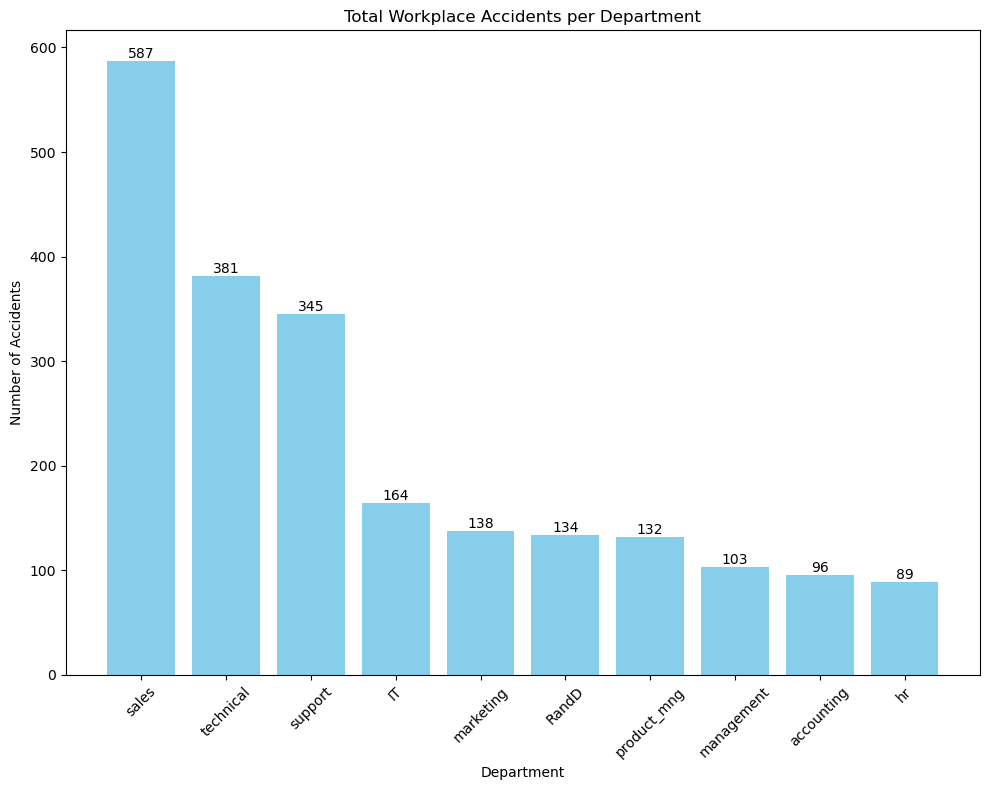

In [49]:
accidents_department = hr_data.groupby('Department')['Work_accident'].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(accidents_department.index, accidents_department, color='skyblue')
ax.set_title('Total Workplace Accidents per Department')
ax.set_ylabel('Number of Accidents')
ax.set_xlabel('Department')


for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
            ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Personalomsättning per avdelning
Analysen av personalomsättning (turnover rate) visar att vissa avdelningar har betydligt högre personalomsättning än andra. Detta kan vara ett tecken på lågt medarbetarengagemang, brist på utvecklingsmöjligheter eller andra arbetsmiljöproblem. Att förstå varför anställda lämnar dessa avdelningar är avgörande för att förbättra retentionen.

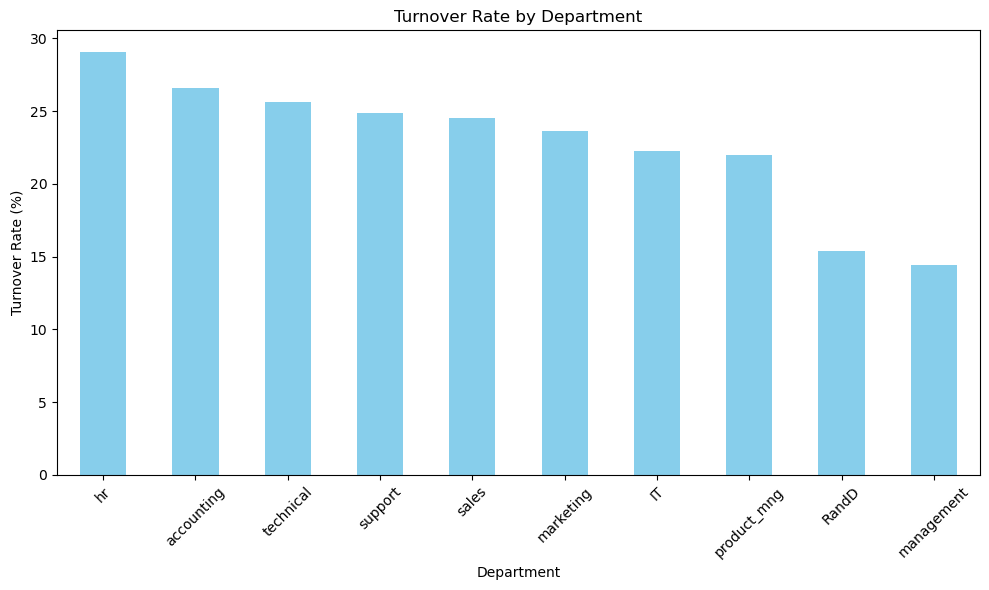

In [50]:
turnover_rate = hr_data[hr_data['left'] == 1].groupby('Department').size() / hr_data.groupby('Department').size() * 100

ax = turnover_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='skyblue', title='Turnover Rate by Department')

plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Lönedistrubution per avdelning
Genom att visualisera lönedistrubutionen per avdelning ser vi att vissa avdelningar har en större andel anställda med högre löner, medan andra domineras av anställda med lägre lönenivåer. Till exempel har avdelningen försäljning (Sales) en större andel med låg lön, vilket kan påverka medarbetarnas motivation och långsiktiga engagemang.

<Figure size 1000x600 with 0 Axes>

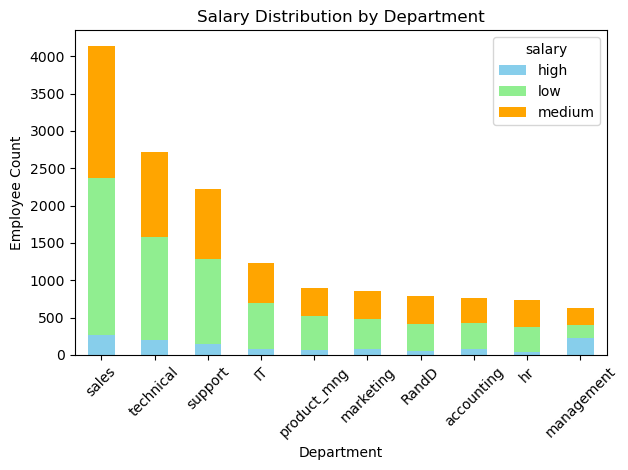

In [51]:
dept_salary_counts = hr_data.groupby(['Department', 'salary']).size().unstack(fill_value=0)

dept_salary_counts = dept_salary_counts.loc[dept_salary_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
dept_salary_counts.plot(
    kind='bar', 
    stacked=True, 
    color=['skyblue', 'lightgreen', 'orange'],
    title='Salary Distribution by Department'
)
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Nöjdhet baserat på arbetsområde

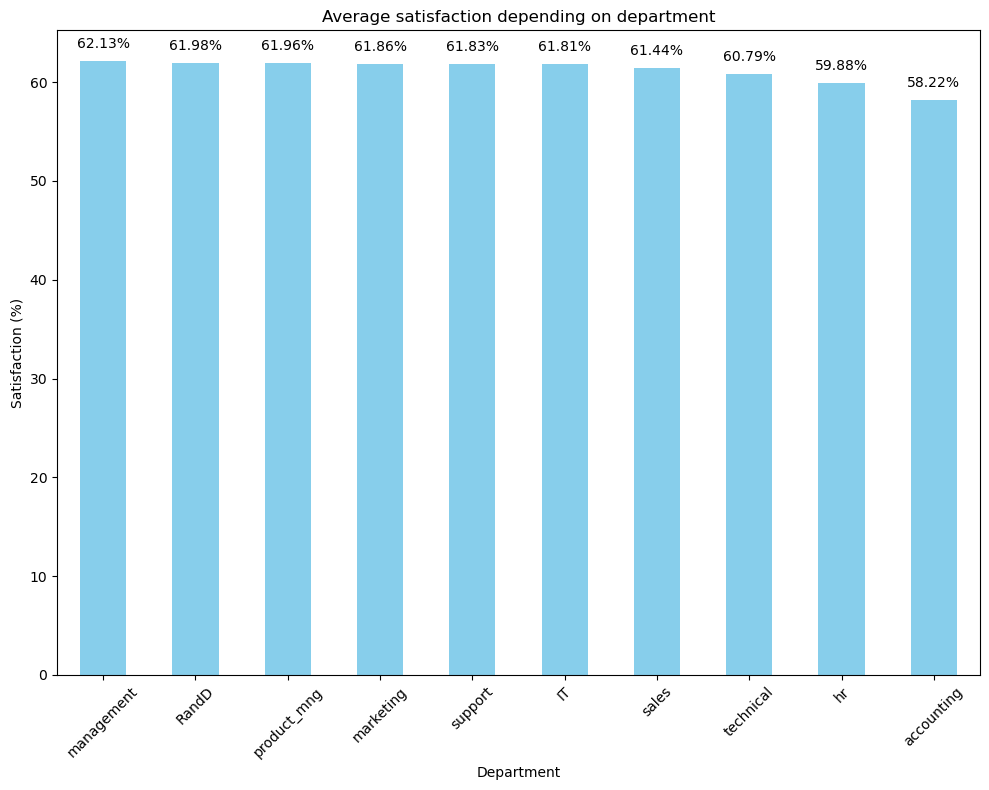

In [54]:
avg_satisfaction = hr_data.groupby("Department")["satisfaction_level"].mean() * 100
avg_satisfaction = avg_satisfaction.sort_values(ascending=False)


ax = avg_satisfaction.plot(kind='bar', figsize=(10, 8), title='Average satisfaction depending on department', color='skyblue')
plt.ylabel('Satisfaction (%)')

for i, value in enumerate(avg_satisfaction):
    ax.text(i, value + 1, f'{value:.2f}%', ha='center', va='bottom')
    
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()